In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [31]:
df_train = pd.read_csv("../F16GVT_Files/BenchmarkData/F16Data_FullMSine_Level3.csv").to_numpy()
df_train = pd.read_csv("../F16GVT_Files/BenchmarkData/F16Data_FullMSine_Level2_Validation.csv").to_numpy()
# u_train, y_train = (df_train[:7372, :2], df_train[:7372, 2:5])
u_train, y_train = (df_train[:, :2], df_train[:, 2:5])
u_1 = u_train[:, 0]
u_2 = u_train[:, 1]
y_1 = y_train[:1171, 0]
y_2 = y_train[:1217, 1]
y_3 = y_train[:1289, 2]

In [32]:
def current_y1(i, y1, y2, y3, u1, u2):

    y1 = (2.11520e-05 + 
    -2.33002e-01 * y1[i-11] + 
    1.15453e-01 * y2[i-4] + 
    1.03940e+00 * y1[i-1] + 
    1.16311e-01 * y2[i-20] + 
    -5.42400e-08 * u1[i-91] * u1[i-92] + 
    -1.86861e+01 * u2[i-1] + 
    2.49469e+01 * u2[i-2] + 
    4.49770e-06 * u1[i-103] * y2[i-108] + 
    -3.17942e-02 * y3[i-28] + 
    -2.18624e-03 * y3[i-289] * u2[i-90] + 
    -8.76605e-02 * y2[i-11] + 
    -4.58128e-02 * y1[i-4] + 
    5.38627e-03 * u1[i-4] + 
    1.33888e-03 * y3[i-227] + 
    -4.98650e+00 * u2[i-6] )
    
    return y1

def current_y2(i, y1, y2, y3, u1, u2):
    y2 = (3.29901e-05 + 
        7.45361e-02 * y3[i-1] + 
        -2.27768e-01 * u2[i-21] + 
        -1.72706e-04 * u1[i-16] + 
        -3.28224e-01 * y2[i-4] + 
        1.18799e-04 * y1[i-120] * y1[i-110] + 
        -7.82010e-03 * u2[i-28] + 
        1.82373e-04 * y1[i-134] * y1[i-161] + 
        -4.74804e-03 * u2[i-526] + 
        8.56644e-03 * y3[i-26] + 
        7.45361e-02 * y3[i-1] + 
        5.49514e-01 * y2[i-1] + 
        -3.44952e-04 * u1[i-26] + 
        7.45361e-02 * y3[i-1] + 
        -3.33489e-03 * y3[i-62] + 
        5.49514e-01 * y2[i-1])
    
    return y2
    
def current_y3(i, y1, y2, y3, u1, u2):
    y3 = (
        -3.64495e-05 + 
        2.06884e-01 * y1[i-1] + 
        9.33007e-01 * y3[i-1] + 
        3.72190e-01 * u2[i-1] + 
        -1.44423e-04 * u1[i-5] + 
        4.10362e-03 * u2[i-86] + 
        1.26937e-02 * y2[i-26] + 
        -5.75349e-04 * y3[i-66] + 
        1.50596e-03 * y2[i-150] + 
        9.74304e-02 * y1[i-11] + 
        -1.59751e-01 * y3[i-12] + 
        3.72190e-01 * u2[i-1] + 
        -5.39865e-03 * u1[i-6] + 
        -1.92875e-03 * y3[i-186] + 
        -1.78853e+00 * u2[i-6] + 
        3.51138e-02 * u2[i-124] * y3[i-171] * y1[i-171] * y2[i-110] * u2[i-133] * y2[i-217])
    return y3

In [33]:
samples = 1001
result_y1 = list()
result_y2 = list()
result_y3 = list()

for i in range(samples):
    result_y1.append(current_y1(i=i+1000, y1=y_1, y2=y_2, y3=y_3, u1=u_1, u2=u_2))
    result_y2.append(current_y2(i=i+1000, y1=y_1, y2=y_2, y3=y_3, u1=u_1, u2=u_2))
    result_y3.append(current_y3(i=i+1000, y1=y_1, y2=y_2, y3=y_3, u1=u_1, u2=u_2))
    
    y_1 = np.concatenate((y_1, np.array(result_y1)), axis=0)
    y_2 = np.concatenate((y_2, np.array(result_y2)), axis=0)
    y_3 = np.concatenate((y_3, np.array(result_y3)), axis=0)



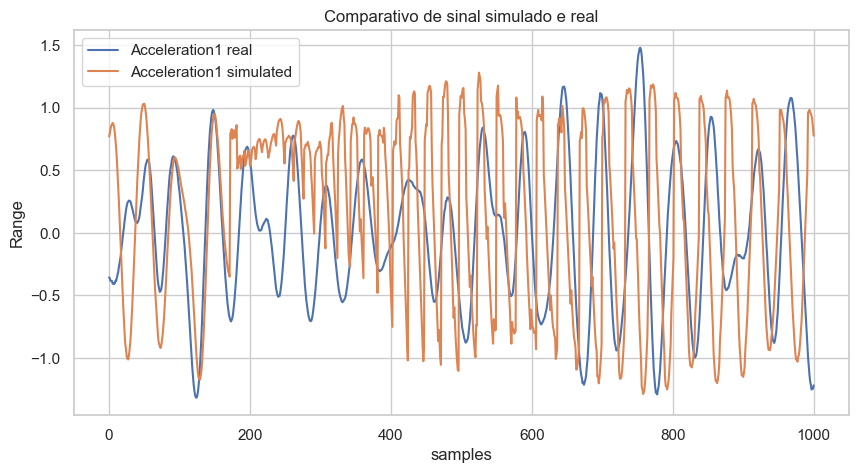

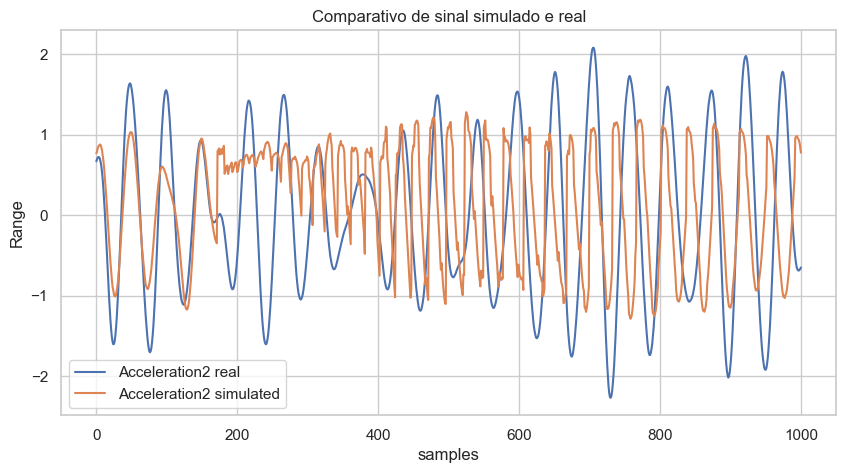

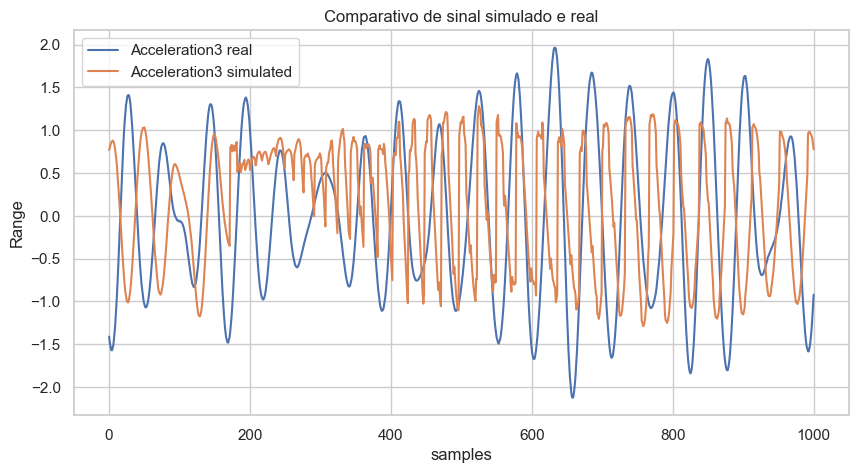

In [35]:
final_result_y1 = pd.DataFrame({
    'real':y_train[1171:2171+1, 0],
    'simulated': result_y1
})

plt.figure(figsize=(10, 5))
sns.lineplot(data=final_result_y1, x=final_result_y1.index, y='real', label='Acceleration1 real')
sns.lineplot(data=final_result_y1, x=final_result_y1.index, y='simulated', label='Acceleration1 simulated')

plt.title('Comparativo de sinal simulado e real')
plt.xlabel('samples')
plt.ylabel('Range')
plt.legend()
plt.savefig("acceleration1.png")
plt.show()

final_result_y2 = pd.DataFrame({
    'real':y_train[1217:2218, 1],
    'simulated': result_y1
})

plt.figure(figsize=(10, 5))
sns.lineplot(data=final_result_y2, x=final_result_y2.index, y='real', label='Acceleration2 real')
sns.lineplot(data=final_result_y2, x=final_result_y2.index, y='simulated', label='Acceleration2 simulated')

plt.title('Comparativo de sinal simulado e real')
plt.xlabel('samples')
plt.ylabel('Range')
plt.legend()
plt.savefig("acceleration2.png")
plt.show()

final_result_y3 = pd.DataFrame({
    'real': y_train[1289:2290, 2],
    'simulated': result_y1
})

plt.figure(figsize=(10, 5))
sns.lineplot(data=final_result_y3, x=final_result_y3.index, y='real', label='Acceleration3 real')
sns.lineplot(data=final_result_y3, x=final_result_y3.index, y='simulated', label='Acceleration3 simulated')

plt.title('Comparativo de sinal simulado e real')
plt.xlabel('samples')
plt.ylabel('Range')
plt.legend()
plt.savefig("acceleration3.png")
plt.show()